# Scripts for calculating Kappas

#### Import Libraries

In [559]:
from nltk import agreement
import pandas as pd
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Kappas per Batch
ref: https://learnaitech.com/how-to-compute-inter-rater-reliablity-metrics-cohens-kappa-fleisss-kappa-cronbach-alpha-kripndorff-alpha-scotts-pi-inter-class-correlation-in-python/

In [560]:
os.chdir("D:\Programs\Jupyter Notebooks\Thesis RIP Scripts\Annotations\Batch 012") # CHANGE VALUE PER BATCH
files = []
for file in glob.glob("*.csv"):
    print(file)
    files.append(file)
    
print(files)

diego_manzano.csv
marybelle_tandoc.csv
samantha_santos.csv
['diego_manzano.csv', 'marybelle_tandoc.csv', 'samantha_santos.csv']


In [561]:
coder1 = pd.read_csv(files[0])
#coder1 = pd.read_excel('katrina_ruzol.xlsx')
coder1 = coder1.replace(r'^\s*$', np.NaN, regex=True)
coder1.fillna(0)

coder2 = pd.read_csv(files[1])
#coder2 = pd.read_excel('')
coder2 = coder2.replace(r'^\s*$', np.NaN, regex=True)
coder2.fillna(0)

coder3 = pd.read_csv(files[2])
#coder3 = pd.read_excel('samantha_santos.xlsx')
coder3 = coder3.replace(r'^\s*$', np.NaN, regex=True)
coder3.fillna(0)

coder1 = coder1.replace(np.nan,0)
coder2 = coder2.replace(np.nan,0)
coder3 = coder3.replace(np.nan,0)

In [562]:
print(coder1.info())
print(coder2.info())
print(coder3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1898 non-null   int64  
 1   message            1898 non-null   object 
 2   author             1898 non-null   object 
 3   time_text          1898 non-null   object 
 4   Direct Harassment  1898 non-null   float64
 5   Hate Speech        1898 non-null   float64
 6   Sexual Harassment  1898 non-null   float64
 7   Trolling           1898 non-null   float64
 8   Others             1898 non-null   float64
 9   Toxic              1898 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 148.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1898 non-null   int64

In [563]:
coder1.drop(coder1.columns.difference(['Direct Harassment','Hate Speech', 'Sexual Harassment', 'Trolling', 'Others', 'Toxic']), 1, inplace=True)
coder2.drop(coder2.columns.difference(['Direct Harassment','Hate Speech', 'Sexual Harassment', 'Trolling', 'Others', 'Toxic']), 1, inplace=True)
coder3.drop(coder3.columns.difference(['Direct Harassment','Hate Speech', 'Sexual Harassment', 'Trolling', 'Others', 'Toxic']), 1, inplace=True)

columns = coder1.columns


In [564]:
for y in coder1.columns:
    #print(f'Coder 1: {y}')
    coder1[y] = coder1[y].astype(str).astype(float)
        
            
for y in coder2.columns:
    #print(f'Coder 2: {y}')
    coder2[y] = coder2[y].astype(str).astype(float)

for y in coder3.columns:
    #print(f'Coder 3: {y}')        
    coder3[y] = coder3[y].astype(str).astype(float)

In [565]:
coder3.info()
print(coder3['Direct Harassment'].unique())
print(coder3['Hate Speech'].unique())
print(coder3['Sexual Harassment'].unique())
print(coder3['Trolling'].unique())
print(coder3['Others'].unique())
print(coder3['Toxic'].unique())

coder3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Direct Harassment  1898 non-null   float64
 1   Hate Speech        1898 non-null   float64
 2   Sexual Harassment  1898 non-null   float64
 3   Trolling           1898 non-null   float64
 4   Others             1898 non-null   float64
 5   Toxic              1898 non-null   float64
dtypes: float64(6)
memory usage: 89.1 KB
[0. 1.]
[0. 1.]
[0.]
[0. 1.]
[0.]
[0.]


,Direct Harassment,Hate Speech,Sexual Harassment,Trolling,Others,Toxic
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
1893,0.0,0.0,0.0,0.0,0.0,0.0
1894,0.0,0.0,0.0,0.0,0.0,0.0
1895,0.0,0.0,0.0,0.0,0.0,0.0
1896,0.0,0.0,0.0,0.0,0.0,0.0


In [566]:
data = []
for col in columns:
    col_code1 = coder1[col]
    col_code2 = coder2[col]
    col_code3 = coder3[col]
    
    formatted_codes = [[1,i,col_code1[i]] for i in range(len(col_code1))] + [[2,i,col_code2[i]] for i in range(len(col_code2))]  + [[3,i,col_code3[i]] for i in range(len(col_code3))]
    #print(formatted_codes)
    kappa = agreement.AnnotationTask(data=formatted_codes)
    try:
        kappa = kappa.multi_kappa()
    except ZeroDivisionError:
        kappa = 1.0
    print(f'{col}: {kappa}')
    data.append(kappa)

Direct Harassment: 0.057123572450655975
Hate Speech: -0.002350083177082824
Sexual Harassment: 0.0
Trolling: 0.0538469070742539
Others: 0.0
Toxic: 0.0


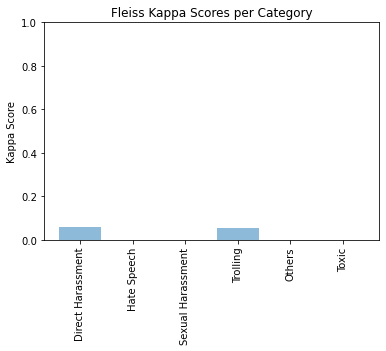

In [567]:
objects = ('Direct Harassment', 'Hate Speech', 'Sexual Harassment', 'Trolling', 'Others', 'Toxic')
y_pos = np.arange(len(objects))

plt.bar(y_pos, data, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.xticks(rotation=90)
plt.ylabel('Kappa Score')
plt.title('Fleiss Kappa Scores per Category')
axes = plt.gca()
axes.set_ylim([0,1])
plt.show()

## Kappas per Video

## Kappas per Channel